# LOGISTIC REGRESSION FROM SCRATCH


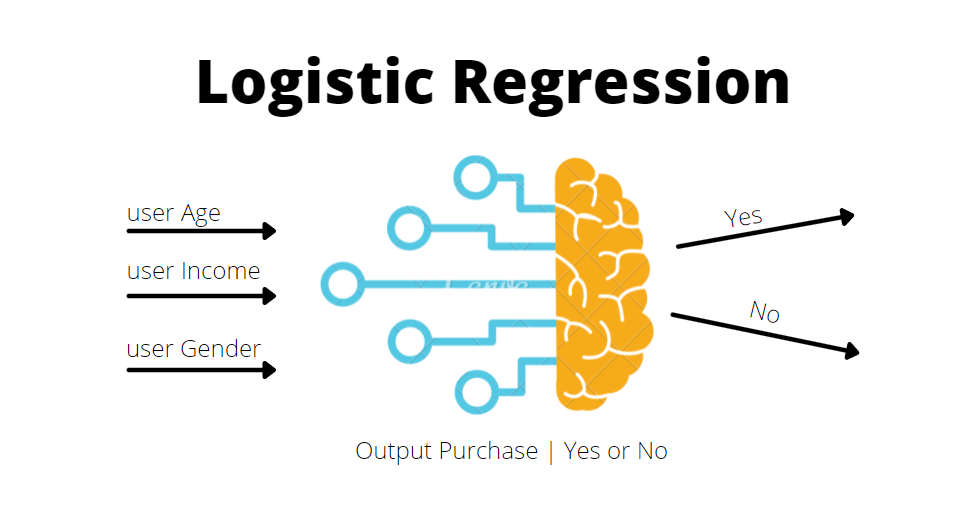

**Binary logistic regression is the statistical technique used to predict the relationship between the dependent variable (Y) and the independent variable (X), where the dependent variable is binary in nature. For example, the output can be Success/Failure, 0/1 , True/False, or Yes/No.**

> **It is an classification Algorithm**

**Logistic regression is used to obtain odds ratio in the presence of more than one explanatory variable. The procedure is quite similar to multiple linear regression, with the exception that the response variable is binomial. The result is the impact of each variable on the odds ratio of the observed event of interest**

# Types of Logistic Regression

 **1. Binary Logistic Regression**

        The categorical response has only two 2 possible outcomes. Example: Spam or Not

**2. Multinomial Logistic Regression**

        Three or more categories without ordering. Example: Predicting which food is preferred more (Veg, Non-Veg, Vegan)

**3. Ordinal Logistic Regression**

        Three or more categories with ordering. Example: Movie rating from 1 to 5

# Decision Boundary
    To predict which class a data belongs, a threshold can be set. Based upon this threshold, the obtained estimated probability is classified into classes.

    Say, if predicted_value ≥ 0.5, then classify email as spam else as not spam.

    Decision boundary can be linear or non-linear. Polynomial order can be increased to get complex decision boundary.

# Cost Function
    Linear regression uses mean squared error as its cost function. If this is used for logistic regression, then it will be a non-convex function of parameters (theta). Gradient descent will converge into global minimum only if the function is convex.
    
    
 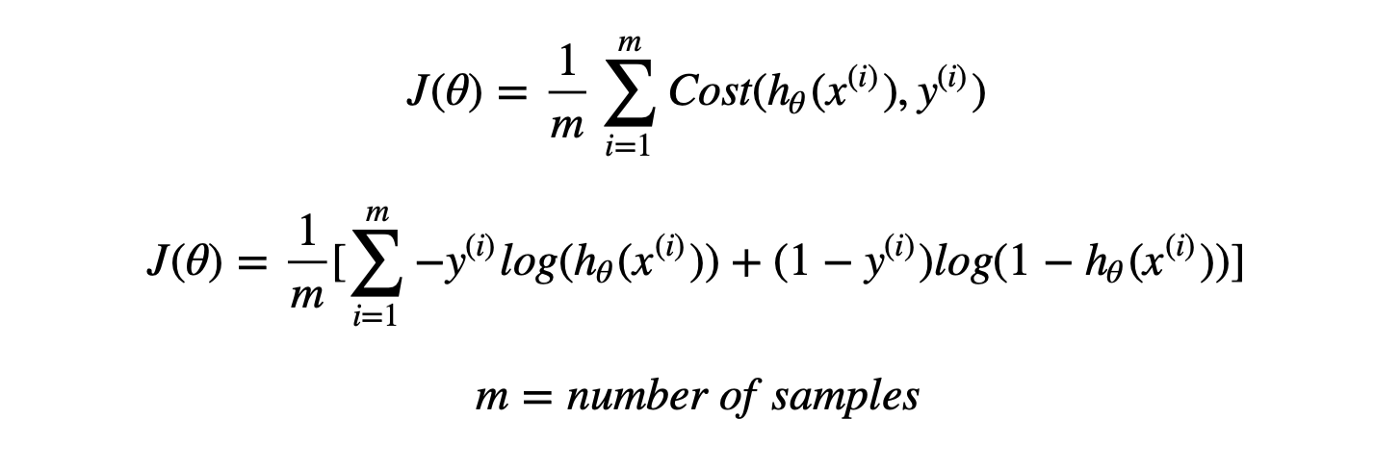

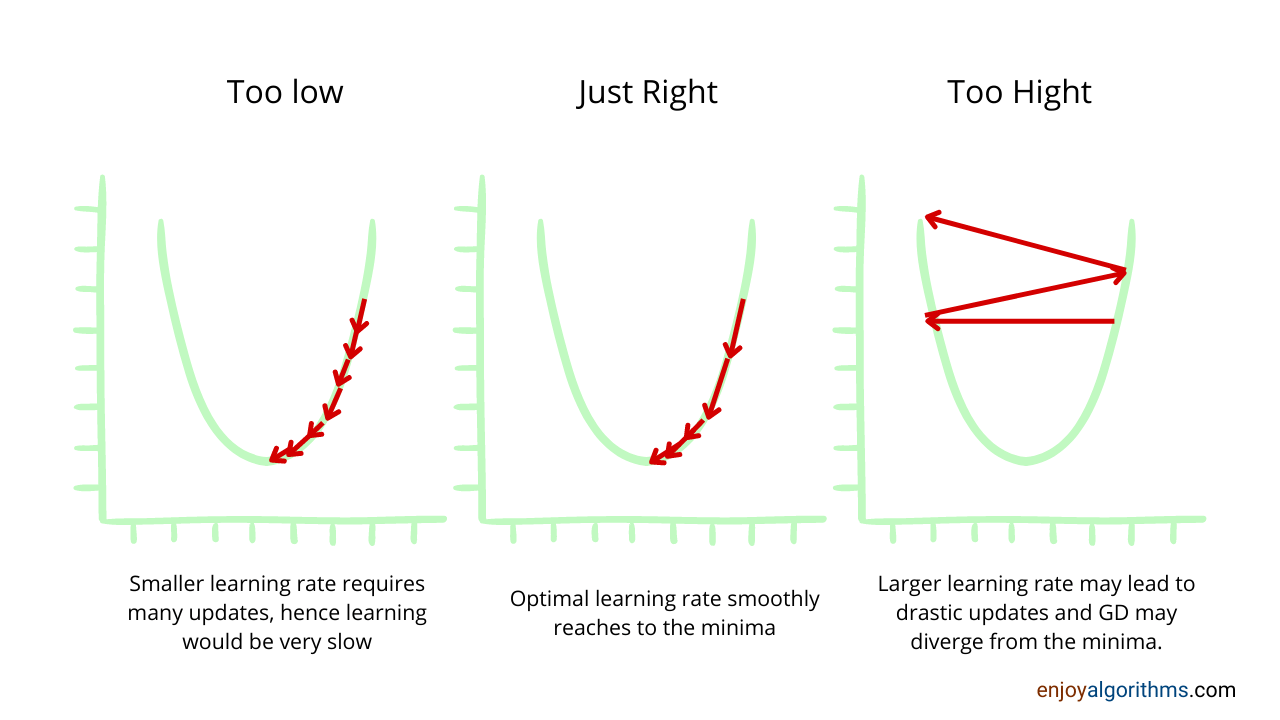

# Gradient Decent
    
    Gradient descent is an optimization algorithm which is commonly-used to train machine learning models and neural networks. Training data helps these models learn over time, and the cost function within gradient descent specifically acts as a barometer, gauging its accuracy with each iteration of parameter updates.
    
   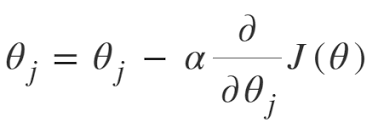

# Sigmoid Function

    A sigmoid function is a bounded, differentiable, real function that is defined for all real input values and has a non-negative derivative at each point and exactly one inflection point. A sigmoid "function" and a sigmoid "curve" refer to the same object.

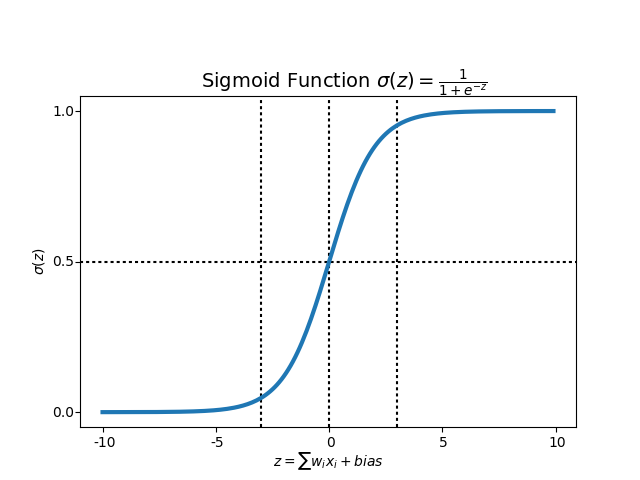

# LET US CODE ALGORITHM FROM SCRATCH

**IMPORTING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd

**SIGMOID FUNCTION**


In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

**LOGISTIC REGRESSION**

In [3]:
class LogisticRegression():
    def __init__(self,lr=0.1,n_iter=2000):
        self.lr=lr
        self.n_iter=n_iter
        self.weights=None
        self.bias=None
        
    def fit(self,x,y):
        n_samples,n_features=x.shape
        self.weights=np.zeros(n_features)
        self.bias=0
        
        for _ in range(self.n_iter):
            linear_pred=np.dot(x,self.weights)+self.bias
            predict=sigmoid(linear_pred)
            
            dw=(1/n_samples)*np.dot(x.T,(predict-y))
            db=(1/n_samples)*np.sum(predict-y)
            
            self.weights=self.weights-self.lr-dw
            self.bias=self.bias-self.lr-db
            
    def predict(self,x):
        linear_pred=np.dot(x,self.weights)+self.bias
        y_pred=sigmoid(linear_pred)
        class_pred=[0 if y<=0.5 else 1 for y in y_pred]
        return class_pred
    
        
        

**READING THE DATA SETS**

In [4]:
df=pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


**PRE-PROCESSING THE DATA'S**

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df.Sex

0      1
1      0
2      1
3      0
4      1
      ..
913    1
914    1
915    1
916    0
917    1
Name: Sex, Length: 918, dtype: int64

In [6]:
le=LabelEncoder()
df['ChestPainType']=le.fit_transform(df['ChestPainType'])
df.ChestPainType

0      1
1      2
2      1
3      0
4      2
      ..
913    3
914    0
915    0
916    1
917    2
Name: ChestPainType, Length: 918, dtype: int64

In [7]:
le=LabelEncoder()
df['RestingECG']=le.fit_transform(df['RestingECG'])
df.RestingECG

0      1
1      1
2      2
3      1
4      1
      ..
913    1
914    1
915    1
916    0
917    1
Name: RestingECG, Length: 918, dtype: int64

In [8]:
le=LabelEncoder()
df['ExerciseAngina']=le.fit_transform(df['ExerciseAngina'])
df.ExerciseAngina

0      0
1      0
2      0
3      1
4      0
      ..
913    0
914    0
915    1
916    0
917    0
Name: ExerciseAngina, Length: 918, dtype: int64

In [9]:
le=LabelEncoder()
df['ST_Slope']=le.fit_transform(df['ST_Slope'])
df.ST_Slope

0      2
1      1
2      2
3      1
4      2
      ..
913    1
914    1
915    1
916    1
917    2
Name: ST_Slope, Length: 918, dtype: int64

**SPLITING THE VALUES OF X_TRAIN AND Y_TRAIN**

In [10]:
x=df.iloc[:,:11]
x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [11]:
y=df['HeartDisease']
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

**TRAIN TEST SPLIT FUNCTION**

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

**CALLING THE FUNCTION AND FIT THE VALUES**

In [13]:
clasfy=LogisticRegression()
clasfy.fit(x_train,y_train)
y_pred=clasfy.predict(x_test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


**ACCURACY OF THE MODEL**

In [14]:
def accuracy(y_pred,y_test):
    return np.sum(y_pred==y_test)/len(y_test)

In [15]:
acc=accuracy(y_pred,y_test)
print(acc)

0.5565217391304348
